## Traffic Speed Prediction
1. Data preprocessing
2. Runing all baseline models on three trafffic datasets (time series+network)
3. Comapring the results and interpretation

In [41]:
import pandas as pd
import numpy as np
import csv
import statistics
import random
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure  
from scipy import stats

## Los Angeles Dataset


This traffic dataset contains traffic information collected from loop detectors in the highway of Los Angeles County (Jagadish et al., 2014). It contains 207 sensors and collect 4 months of data ranging from Mar 1st 2012 to Jun 30th 2012 for the experiment.

Adjacancy Matrix (sensor connectivity)

In [4]:
import pandas as pd

df_adj = pd.read_csv('./data/los_adj.csv')

df_adj.head()

,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,...,0.179,0.180,0.119804092,0.181,0.182,0.183,0.184,0.185,0.186,0.187
0,0.0,1.000000,0.717438,0.000000,0.000000,0.000000,0.000000,0.390457,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.717438,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.000000,0.000000,1.000000,0.633722,0.894812,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.000000,0.000000,0.633722,1.000000,0.361432,0.135197,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.000000,0.000000,0.894812,0.361432,1.000000,0.000000,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:

vis_los= open( './data/los_vis_edgelist.txt', 'w')


edges_los=[]

for index, row in df_adj.iterrows():
    
    for j in range(len(row)):
        
        if row[j]>0:

            
          edges_los.append( [int(index), int(j) ])  
            
          vis_los.write(str(index)+" "+ str(j))
          vis_los.write('\n')
        
        

vis_los.close()

print(len(edges_los))

2814


Sensor connectivity graph

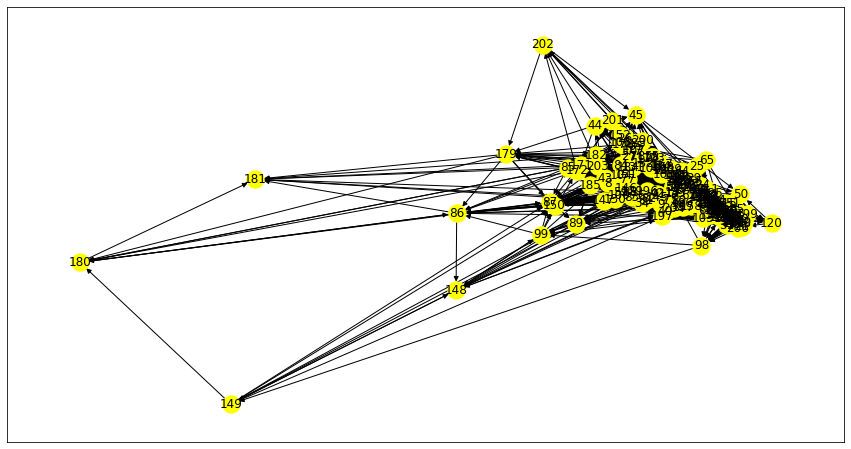

In [60]:
import networkx as nx

import matplotlib.pyplot as plt


G = nx.read_edgelist('./data/los_vis_edgelist.txt', nodetype=int, create_using= nx.DiGraph())
plt.figure(figsize =(15, 8))
nx.draw_networkx(G,node_color ='yellow', pos=nx.spectral_layout(G) )

plt.savefig('los_adj.pdf', bbox_inches='tight')

Los Angeles  speed data

In [43]:
import numpy as np
import random


df_los = pd.read_csv('./data/los_speed.csv')

features_los=[]
los_speed=[]
los_sensor_speed=[]

random_num=random.randint(0,200)

for index, row in df_los.iterrows():
    
    row_fill=[]
    
    los_sensor_speed.append(row[random_num])
    
    for j in row:
        
       row_fill.append(j)
       los_speed.append(j)
    
    features_los.append(row_fill)
        
print(len(features_los))


print(min(los_speed))
print(max(los_speed))
print(stats.mode(los_speed))

2016
1.0
70.0
ModeResult(mode=array([67.]), count=array([4674]))


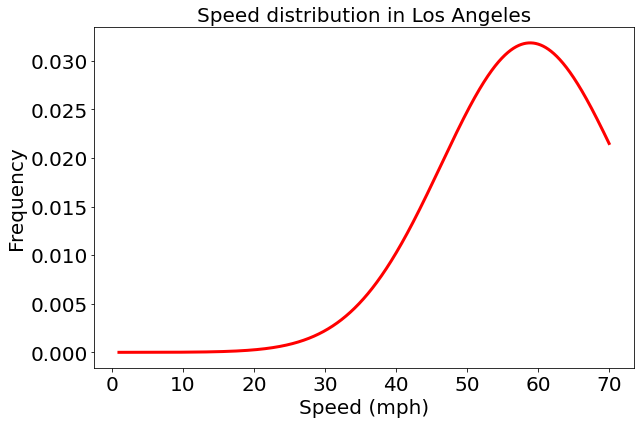

In [38]:
from scipy import stats
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np



fig, ax = plt.subplots()
fig.set_size_inches(9, 6)


ax.grid(True)
ax.grid(linestyle=':')
los_speed.sort()
hmean = np.mean(los_speed)
hstd = np.std(los_speed)
pdf = stats.norm.pdf(los_speed, hmean, hstd)
plt.plot(los_speed, pdf, color= 'r', linewidth=3)

plt.xlabel('Speed (mph)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Speed distribution in Los Angeles', fontsize=20)


plt.tick_params(axis='both',labelsize=20)
fig.tight_layout()

#plt.show() 

plt.savefig('los_speed.pdf', bbox_inches='tight')

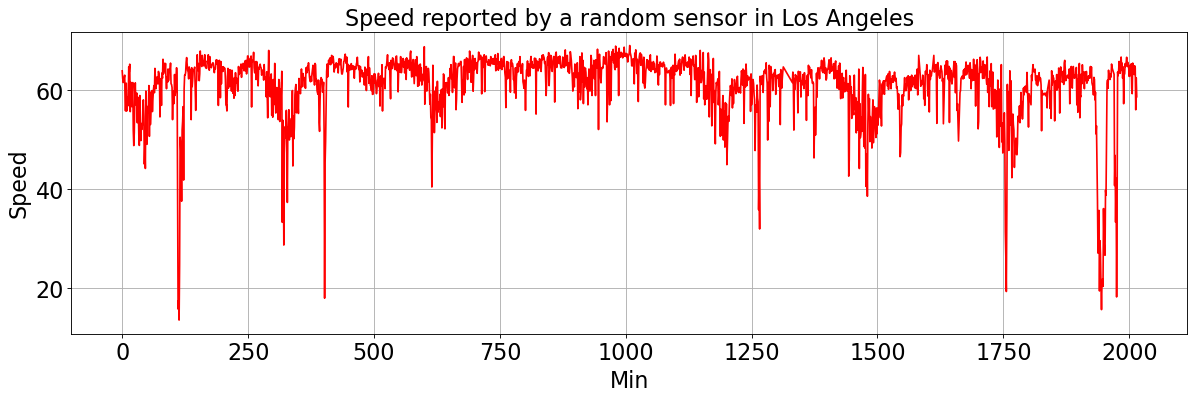

In [16]:
import numpy as np
import matplotlib.pyplot as plt
    
from matplotlib.pyplot import figure   
    
figure(figsize=(18, 5), dpi=80)  


    
Data = {'h': list(range(len(los_sensor_speed))),
        's': los_sensor_speed
       }

  
dff = pd.DataFrame(Data,columns=['h','s'])
  
plt.plot(dff['h'], dff['s'], color='r' ) #marker='o'
plt.title('Speed reported by a random sensor in Los Angeles', fontsize=20)
plt.xlabel('Min', fontsize=20)
plt.ylabel('Speed', fontsize=20)

plt.tick_params(axis='both',labelsize=20)

plt.grid(True)
#plt.show()

plt.savefig('los_sensor2.pdf', bbox_inches='tight')


In [82]:

nodes_los=list(range(len(features_los[0])))
node_ids_los={}

for i in list(nodes_los):
    
   node_ids_los[str(i)]=i

data_los={'edges':edges_los, 'node_ids': node_ids_los, 
                                     'FX':features_los}

In [83]:
import json

with open('./data/data_los.json', 'w') as f:
    json.dump(data_los, f)

In [84]:

print('number of edges:',len(data_los['edges']))

print('number of nodes:',len(data_los['node_ids']))

print('Length of sequnece:',len(data_los['FX']))


number of edges: 2814
number of nodes: 207
Length of sequnece: 2016


# PeMSD4
The dataset refers to the traffic speed data in San Francisco Bay Area, containing 307 sensors on 29 roads. The time span of the dataset is January-February in 2018. It is a popular benchmark for traffic forecasting.

In [59]:
import numpy as np
import pandas as pd

edges_d4=[]


vis_d4= open( './data/d4_vis_edgelist.txt', 'w')

with open('./data/PeMSD4/PeMSD4_adj.csv', 'r') as csvfile:
    
    datareader = csv.reader(csvfile)
    next(datareader)
    
    for row in datareader:
        
        edges_d4.append( [int(row[0]), int(row[1]) ]) 
        
        vis_d4.write(row[0]+" "+ row[1])
        vis_d4.write('\n')
        
vis_d4.close()


        

number of nodes in in PeMSD4 (San Francisco road network): 307


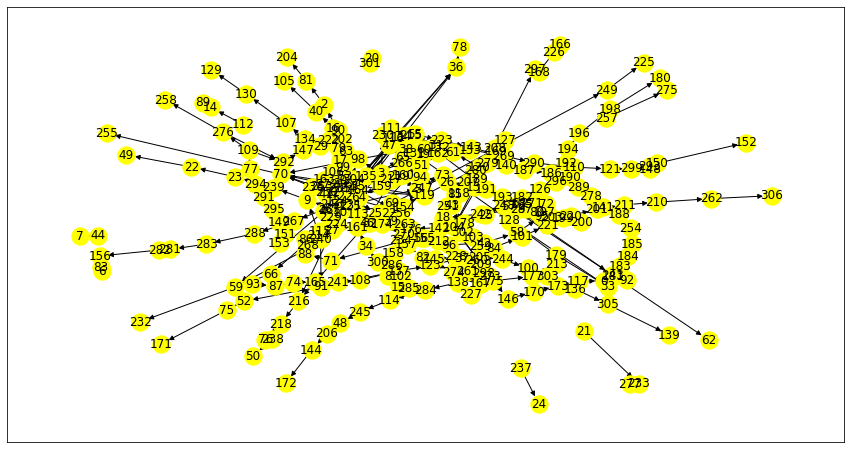

In [60]:
import networkx as nx

import matplotlib.pyplot as plt


G = nx.read_edgelist('./data/d4_vis_edgelist.txt', nodetype=int, create_using= nx.DiGraph())
plt.figure(figsize =(15, 8))
nx.draw_networkx(G,node_color ='yellow', pos=nx.spring_layout(G) )


print('number of nodes in in PeMSD4 (San Francisco road network):', G.number_of_nodes())


plt.savefig('d4_adj.pdf', bbox_inches='tight')


In [40]:
import json

data_pems04= np.load('./data/PeMSD4/PeMSD4_speed.npy')


print(len(data_pems04[0]))


features_d4=[]

d4_speed=[]

for i in range(len(data_pems04)):
    
    row=[]
    
    
    for j in data_pems04[i]:
        
        
        row.append(j[2])
        d4_speed.append(j[2])
       

    features_d4.append(row)
    
    
nodes_d4=list(range(len(features_d4[0])))  

    
data_d4={}

nodes_id_d4={}

for i in list(nodes_d4):
    
   nodes_id_d4[str(i)]=i

data_d4={'edges':edges_d4, 'node_ids': nodes_id_d4,  'FX':features_d4}


with open('./data/PeMSD4.json', 'w') as f:
    json.dump(data_d4, f)
    
print('number of edges:',len(data_d4['edges']))

print('number of nodes:',len(data_d4['node_ids']))

print('Length of sequnece:',len(data_d4['FX']))  
print('number of nodes:',len(data_d4['FX'][0]))  

#for i in data_d4['FX']:
    
    #print(len(i))

print(min(d4_speed))
print(max(d4_speed))

print(np.mean(d4_speed))

307
number of edges: 340
number of nodes: 307
Length of sequnece: 16992
number of nodes: 307
3.0
85.2
63.47060711076144


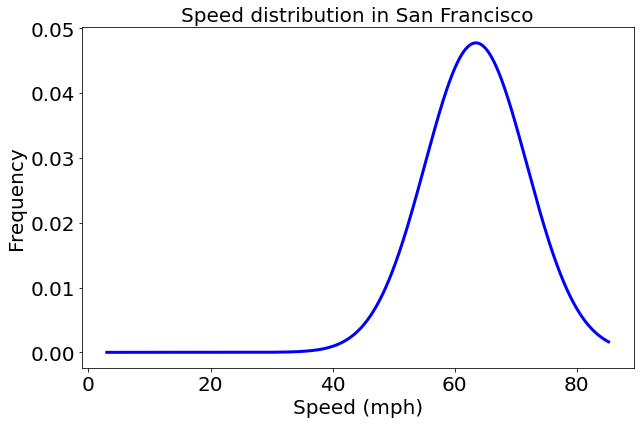

In [6]:
from scipy import stats
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)


ax.grid(True)
ax.grid(linestyle=':')
d4_speed.sort()
hmean = np.mean(d4_speed)
hstd = np.std(d4_speed)
pdf = stats.norm.pdf(d4_speed, hmean, hstd)
plt.plot(d4_speed, pdf, color= 'b', linewidth=3)

plt.xlabel('Speed (mph)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Speed distribution in San Francisco', fontsize=20)


plt.tick_params(axis='both',labelsize=20)
fig.tight_layout()

#plt.show() 

plt.savefig('d4_speed.pdf', bbox_inches='tight')

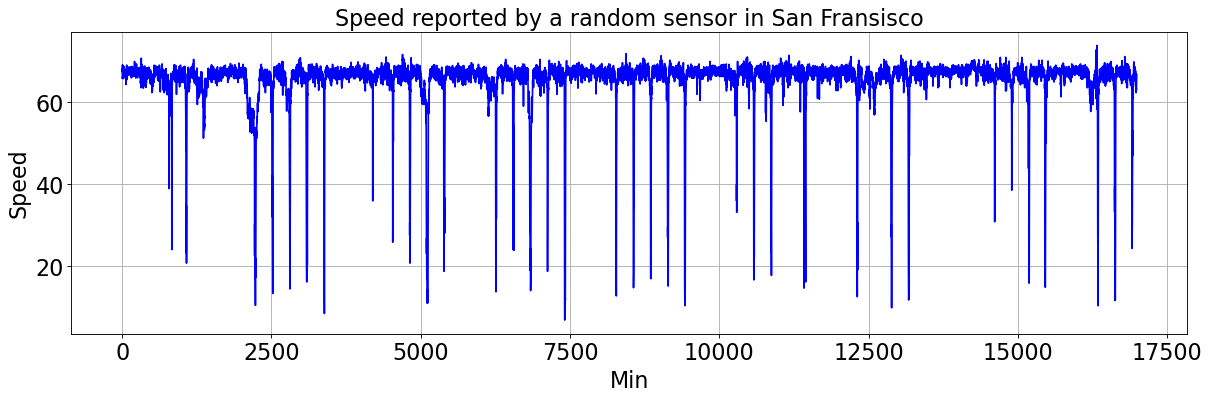

In [57]:
import numpy as np
import matplotlib.pyplot as plt
    
from matplotlib.pyplot import figure   
    
figure(figsize=(18, 5), dpi=80)  


random_num=random.randint(0,len( features_d4[0]))

random_sensor_d4=[]


for i in features_d4:
    
    random_sensor_d4.append(i[random_num])
    
Data = {'h': list(range(len(random_sensor_d4))),
        's': random_sensor_d4
       }

  
dff = pd.DataFrame(Data,columns=['h','s'])
  
plt.plot(dff['h'], dff['s'], color='b' ) #marker='o'
plt.title('Speed reported by a random sensor in San Fransisco', fontsize=20)
plt.xlabel('Min', fontsize=20)
plt.ylabel('Speed', fontsize=20)

plt.tick_params(axis='both',labelsize=20)

plt.grid(True)


plt.savefig('D4_sensor2.pdf', bbox_inches='tight')

## PeMSD8
This dataset contains the traffic data in San Bernardino from July to August in 2016, with 170 detectors on 8 roads with a time interval of 5 minutes. This dataset is popular as a benchmark traffic forecasting dataset.

In [30]:
import numpy as np
import pandas as pd

df_adj_d8 = pd.read_csv('./data/PeMSD8/PeMSD8_adj.csv')

vis_d8= open( './data/d8_vis_edgelist.txt', 'w')

edges_d8=[]

for index, row in df_adj_d8 .iterrows():
    
    for j in range(len(row)):
    
        
        if row[j]>0:

          edges_d8.append( [int(index), int(j) ])  
    
            
          vis_d8.write(str(index)+" "+ str(j))
          vis_d8.write('\n')
        
        

vis_d8.close()


number of nodes in in PeMSD8 (San Bernardino road network): 170


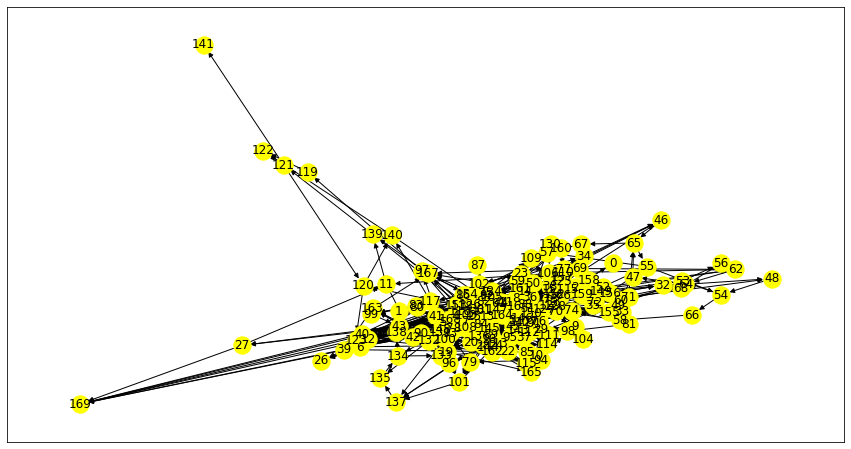

In [34]:
import networkx as nx

import matplotlib.pyplot as plt


G = nx.read_edgelist('./data/d8_vis_edgelist.txt', nodetype=int, create_using= nx.DiGraph())
plt.figure(figsize =(15, 8))
nx.draw_networkx(G,node_color ='yellow', pos=nx.spring_layout(G) )

plt.savefig('d8_adj.pdf', bbox_inches='tight')

print('number of nodes in in PeMSD8 (San Bernardino road network):', G.number_of_nodes())

In [39]:
import json

data_pems08= np.load('./data/PeMSD8/PeMSD8_speed.npy')

features_d8=[]

d8_speed=[]

for i in range(len(data_pems08)):
    
    row=[]
    
    for j in data_pems08[i]:
        
        row.append(j[2])
        d8_speed.append(j[2])
       

    features_d8.append(row)
    
    
nodes_d8=list(range(len(features_d8[0])))  


    
data_d8={}

nodes_id_d8={}

for i in list(nodes_d8):
    
   nodes_id_d8[str(i)]=i

data_d8={'edges':edges_d8, 'node_ids': nodes_id_d8,  'FX':features_d8}


with open('./data/PeMSD8.json', 'w') as f:
    json.dump(data_d8, f)
    
print('number of edges:',len(data_d8['edges']))

print('number of nodes:',len(data_d8['node_ids']))

print('Length of sequnece:',len(data_d8['FX']))    

print('d8',min(d8_speed))
print('d8', max(d8_speed))  
print(np.mean(d8_speed))

number of edges: 547
number of nodes: 170
Length of sequnece: 17856
d8 3.0
d8 82.3
63.762996257642826


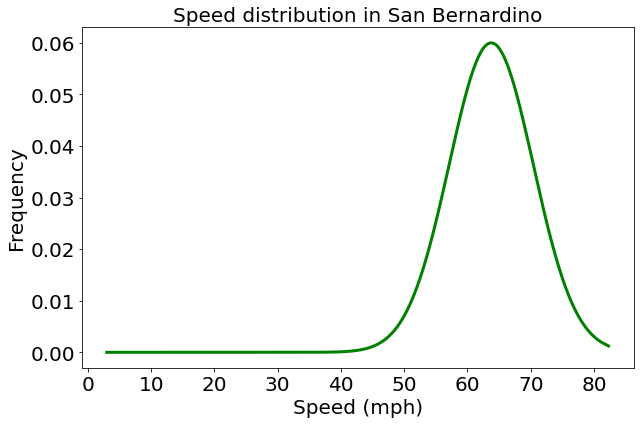

In [72]:
from scipy import stats
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)


ax.grid(True)
ax.grid(linestyle=':')
d8_speed.sort()
hmean = np.mean(d8_speed)
hstd = np.std(d8_speed)
pdf = stats.norm.pdf(d8_speed, hmean, hstd)
plt.plot(d8_speed, pdf, color= 'g', linewidth=3)

plt.xlabel('Speed (mph)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Speed distribution in San Bernardino', fontsize=20)


plt.tick_params(axis='both',labelsize=20)
fig.tight_layout()

#plt.show() 

plt.savefig('d8_speed.pdf', bbox_inches='tight')

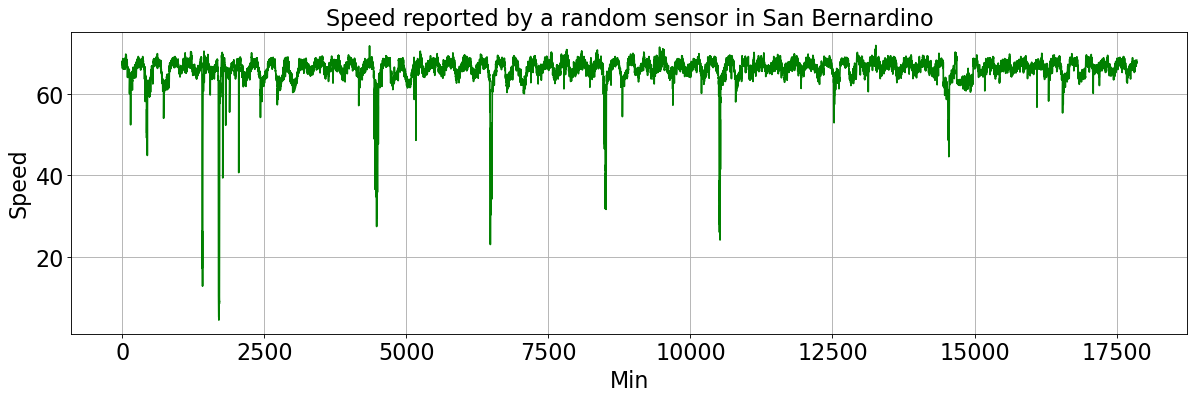

In [69]:
import numpy as np
import matplotlib.pyplot as plt
    
from matplotlib.pyplot import figure   
    
figure(figsize=(18, 5), dpi=80)  


random_num=random.randint(0,len( features_d8[0]))

random_sensor_d8=[]


for i in features_d8:
    
    random_sensor_d8.append(i[random_num])
    
Data = {'h': list(range(len(random_sensor_d8))),
        's': random_sensor_d8
       }

  
dff = pd.DataFrame(Data,columns=['h','s'])
  
plt.plot(dff['h'], dff['s'], color='g' ) #marker='o'
plt.title('Speed reported by a random sensor in San Bernardino', fontsize=20)
plt.xlabel('Min', fontsize=20)
plt.ylabel('Speed', fontsize=20)

plt.tick_params(axis='both',labelsize=20)

plt.grid(True)


plt.savefig('D8_sensor2.pdf', bbox_inches='tight')

## PeMSD7
PeMSD7 is traffic data in District 7 of California consisting of the traffic speed of 228 sensors while the period is from May to June in 2012 (only weekdays) with a time interval of 5 minutes. This dataset is popular for benchmark the traffic forecasting models.

In [15]:

import numpy as np
import pandas as pd

df_d7_adj = pd.read_csv('./data/PeMSD7/PeMSD7_adj.csv')


vis_d7= open( './data/d7_vis_edgelist.txt', 'w')

nodes_d7=set()

edges_d7=[]

id_r=0
for index, row in df_d7_adj.iterrows():
    

            
    id_r+=1
    

    for j in range(len(row)):
    
        
        if row[j]>0:
        
        
          nodes_d7.add(int(index))
          nodes_d7.add(int(j) )

          edges_d7.append( [int(index), int(j) ])  
            
          #print(int(index), int(j))
    
            
          vis_d7.write(str(index)+" "+ str(j))
          vis_d7.write('\n')
 
        
        

vis_d7.close()




In [16]:
import networkx as nx

G = nx.read_edgelist('./data/d7_vis_edgelist.txt', nodetype=int, create_using= nx.DiGraph())
#plt.figure(figsize =(15, 8))
#nx.draw_networkx(G,node_color ='yellow', pos=nx.spring_layout(G) )

#plt.savefig('d7_adj.pdf', bbox_inches='tight')

print('number of nodes in in PeMSD7 (California road network):', G.number_of_nodes())

number of nodes in in PeMSD7 (California road network): 228


In [17]:
df_d7 = pd.read_csv('./data/PeMSD7/PeMSD7_speed.csv')

features_d7=[]
d7_speed=[]
d7_sensor_speed=[]

random_num=random.randint(0,20)

for index, row in df_d7.iterrows():
    

    row_fill=[]
    
    d7_sensor_speed.append(row[random_num])
    
    for j in row:
        
       row_fill.append(j)
       d7_speed.append(j)
    
    features_d7.append(row_fill)
        


In [18]:

nodes_d7=list(range(len(features_d7[0])))

data_d7={}

nodes_id_d7={}

for i in list(nodes_d7):
    
   nodes_id_d7[str(i)]=i

data_d7={'edges':edges_d7, 'node_ids': nodes_id_d7,  'FX':features_d7}

with open('./data/PeMSD7.json', 'w') as f:
    json.dump(data_d7, f)
    
     
print('number of edges:',len(data_d7['edges']))

print('number of nodes:',len(data_d7['node_ids']))

print('number of nodes:', len(nodes_d7))

print('Length of sequnece:',len(data_d7['FX']))       

number of edges: 51495
number of nodes: 228
number of nodes: 228
Length of sequnece: 12671


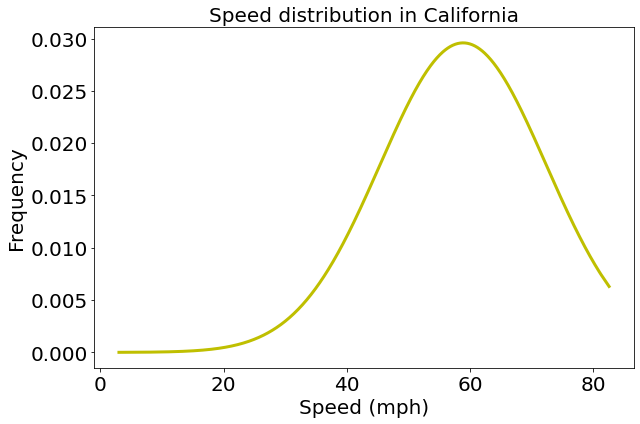

In [20]:

from scipy import stats
from matplotlib.pyplot import figure
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

ax.grid(True)
ax.grid(linestyle=':')
d7_speed.sort()
hmean = np.mean(d7_speed)
hstd = np.std(d7_speed)
pdf = stats.norm.pdf(d7_speed, hmean, hstd)
plt.plot(d7_speed, pdf, color= 'y', linewidth=3)

plt.xlabel('Speed (mph)', fontsize=20)
plt.ylabel('Frequency', fontsize=20)
plt.title('Speed distribution in California', fontsize=20)

plt.tick_params(axis='both',labelsize=20)
fig.tight_layout()

plt.savefig('d7_speed.pdf', bbox_inches='tight')

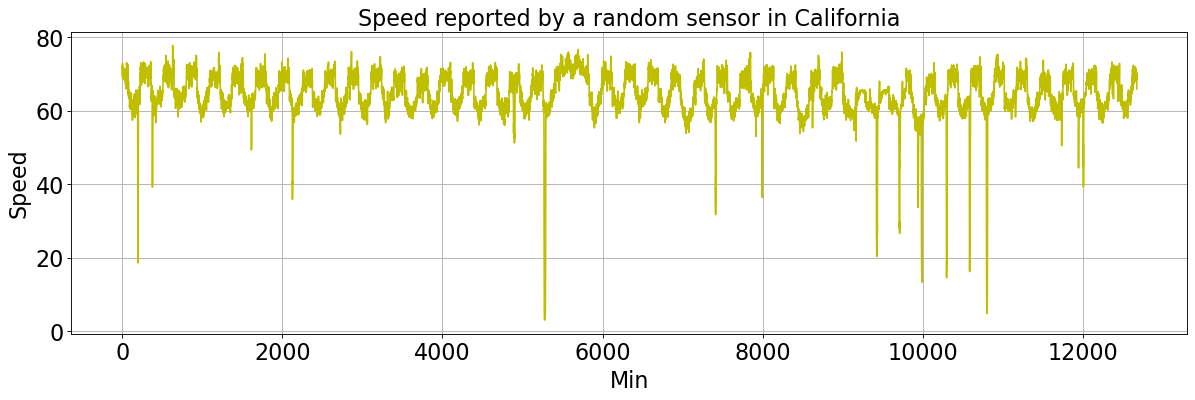

In [21]:
import numpy as np
import matplotlib.pyplot as plt
    
from matplotlib.pyplot import figure   
    
figure(figsize=(18, 5), dpi=80)  


random_num=random.randint(0,100)

random_sensor_d7=[]


for i in features_d7:
    
    random_sensor_d7.append(i[random_num])
    
Data = {'h': list(range(len(random_sensor_d7))),
        's': random_sensor_d7
       }

  
dff = pd.DataFrame(Data,columns=['h','s'])
  
plt.plot(dff['h'], dff['s'], color='y' ) #marker='o'
plt.title('Speed reported by a random sensor in California', fontsize=20)
plt.xlabel('Min', fontsize=20)
plt.ylabel('Speed', fontsize=20)

plt.tick_params(axis='both',labelsize=20)

plt.grid(True)


plt.savefig('D7_sensor2.pdf', bbox_inches='tight')